In [3]:
# Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#### Q1: Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

NCR 709
Bangalore 635
Mumbai 449


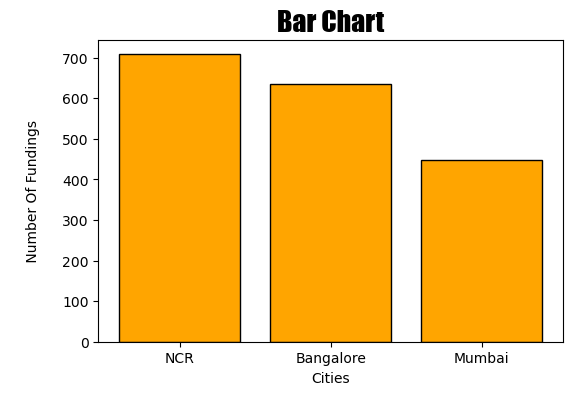

In [10]:
csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()


#Creating a new DataFrame only consists of CityLocations
newDataFrame=pd.DataFrame(df["CityLocation"].values,columns=["Locations"])
newDataFrame["Locations"]=df.CityLocation.apply(lambda x:str(x).split("/")[0].strip())

# Droping NaN Values
newDataFrame.dropna(inplace=True)

# Correcting City Names to avoid Calculation mistakes
newDataFrame[newDataFrame.Locations == "bangalore"] = "Bangalore"
newDataFrame[newDataFrame.Locations == "Delhi"]="New Delhi"

# Merging Noida,Gurgaon and New Delhi as NCR
newDataFrame[(newDataFrame.Locations == "Noida") | (newDataFrame.Locations == "Gurgaon") | (newDataFrame.Locations == "New Delhi")]="NCR"


#Creating new column named prefferd location consisting of Mumbai ,Bangalore and NCR
newDataFrame["PrefferedLoc"]=newDataFrame[(newDataFrame.Locations == "Mumbai") | (newDataFrame.Locations == "Bangalore") |(newDataFrame.Locations == "NCR")] 

# Droping old column named Locations
newDataFrame.pop("Locations")

# droping nan rows
newDataFrame.dropna(inplace=True)

Cities=newDataFrame.PrefferedLoc.value_counts().index
NumOfFundings=newDataFrame.PrefferedLoc.value_counts().values

for city,nFunding in zip(Cities,NumOfFundings):
    print(city,nFunding)

plt.figure(dpi=100)
plt.title("Bar Chart",fontdict={"family":"Impact","size":20})
plt.bar(Cities,NumOfFundings,color="Orange",edgecolor="Black")
plt.xlabel("Cities")
plt.ylabel("\n Number Of Fundings \n")
plt.show()

#### Q2:  Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


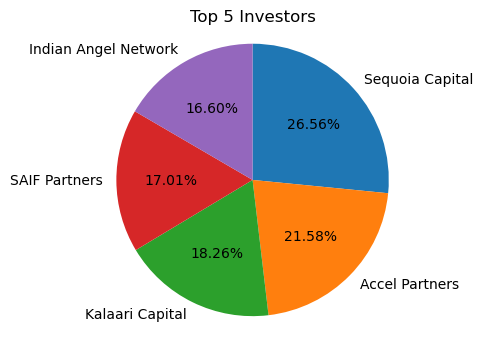

In [15]:
csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()

InvestorsName=[]
for investor in df.InvestorsName:
    if not("undisclosed" in str(investor) or "Undisclosed" in str(investor)):
        namesArr=str(investor).split(",")
        for name in namesArr:
            if name != "":
                InvestorsName.append(name.strip())

dataFrame=pd.DataFrame(InvestorsName,columns=["Names"])

Investors=dataFrame.groupby(by="Names").size().index
nFundings=dataFrame.groupby(by="Names").size().values

nInvestor=[]

for i,f in zip(Investors,nFundings):
    nInvestor.append((i,f))
    
nInvestor=sorted(nInvestor,key=lambda x:x[1],reverse=True)

finalList=nInvestor[:5]

InvestorsNameArr=[]
nFundingArr=[]
for i,n in finalList:
    print(i,int(n))
    InvestorsNameArr.append(i)
    nFundingArr.append(int(n))
    
    
plt.figure(dpi=100)
plt.title("Top 5 Investors")
plt.pie(nFundingArr,labels=InvestorsNameArr,autopct="%.2f%%",counterclock=False,startangle=90)
plt.axis("equal")
plt.show()

#### Q3: After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


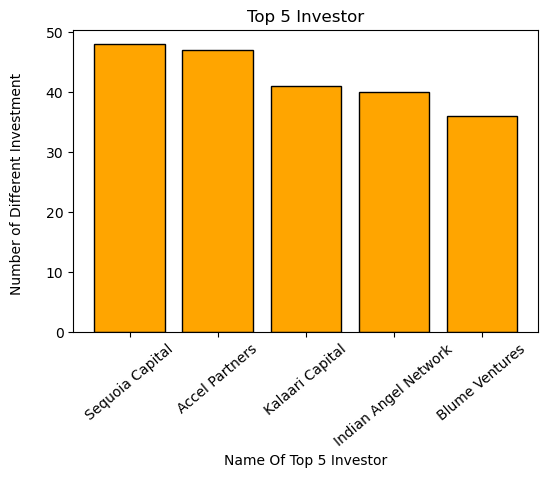

In [14]:
pd.options.mode.chained_assignment=None

csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()

#getting names of Startup including wrong ones
Startuparr=df.StartupName.unique()

# Cleaning the Data of StartpNames
olaIncrtArr=[]
PaytmincrtArr=[]
oyoIncrtArr=[]
flipkartIncrtArr=[]
for i in Startuparr:
    if "Ola" in i.capitalize():
        olaIncrtArr.append(i)
    if "Paytm" in i.capitalize():
        PaytmincrtArr.append(i)
    if "Oyo" in i.capitalize():
        oyoIncrtArr.append(i)
    if "Flipkart" in i.capitalize():
        flipkartIncrtArr.append(i)

oyoIncrtArr.pop(3) # removing OyoFit it is Different Company
df.StartupName[(df.StartupName).isin(olaIncrtArr)]="Ola"
df.StartupName[(df.StartupName).isin(PaytmincrtArr)]="Paytm"
df.StartupName[(df.StartupName).isin(oyoIncrtArr)]="Oyo"
df.StartupName[(df.StartupName).isin(flipkartIncrtArr)]="Flipkart"

nameOfStartup=df.StartupName # getting Name of Startup
investorName=df.InvestorsName # getting Investors Name

newDataFrame=pd.DataFrame(nameOfStartup,columns=["StartupName"])
newDataFrame["InvestorName"]=investorName

tobeRemoved=[] # list of Unwanted Investors Name 
for investor in investorName:
    if "undisclosed" in str(investor) or "Undisclosed" in str(investor):
        tobeRemoved.append(investor)

# Removing Rows with investors as Undisclosed
newDataFrame.drop(newDataFrame[(newDataFrame.InvestorName).isin(tobeRemoved)].index,inplace=True)

#Creating Dictionary with Key as Investors and items as set of companies in which they are Invested
investorDict={}

for sName,iName in zip(newDataFrame.StartupName,newDataFrame.InvestorName):
    nameArr=str(iName).split(",")
    for n in nameArr:
        if n != "":
            name=n.strip()
            if investorDict.get(name) is None:
                investorDict[name] = set()
                investorDict[name].add(name)
            else:
                investorDict[n.strip()].add(sName)

# Sorting Dictionary Items according to number of companies in which they are Invested
topInvestor=sorted(investorDict.keys(),key=lambda x:len(investorDict[x]),reverse=True)                
top5Investor=topInvestor[:5] # picking Top 5 Investors

nDiffType=[]
nameInvestor=[]
for name in top5Investor:
    nameInvestor.append(name)
    nDiffType.append(len(investorDict[name]))
    print(name,int(len(investorDict[name])))

plt.figure(dpi=100)
plt.title("Top 5 Investor")
plt.bar(nameInvestor,nDiffType,color="Orange",edgecolor="Black")
plt.xlabel("Name Of Top 5 Investor")
plt.ylabel("Number of Different Investment \n")
plt.xticks(rotation=40)
plt.show()

#### Q4: Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


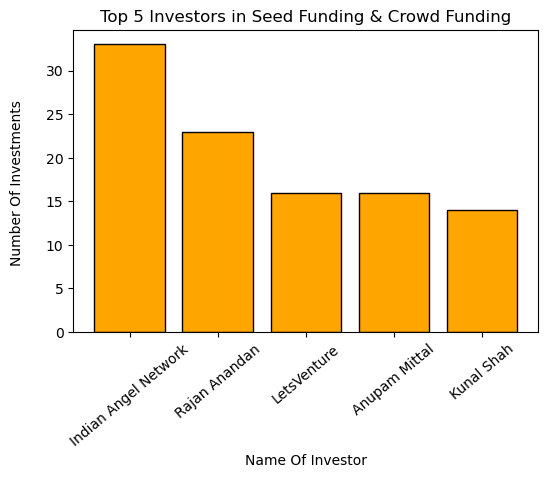

In [16]:
csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()

StartupNames=df.StartupName
InvestmentType=df.InvestmentType
InvestorsName=df.InvestorsName

# Creating New DataFrame
newDataFrame=pd.DataFrame(zip(InvestmentType,InvestorsName,StartupNames),columns=["Type","InvestorsName","StartupName"])
newDataFrame.dropna(inplace=True)

#getting names of Startup including wrong ones
Startuparr=newDataFrame.StartupName.unique()

# Cleaning the Data of StartupNames
olaIncrtArr=[]
PaytmincrtArr=[]
oyoIncrtArr=[]
flipkartIncrtArr=[]
for i in Startuparr:
    if "Ola" in i.capitalize():
        olaIncrtArr.append(i)
    if "Paytm" in i.capitalize():
        PaytmincrtArr.append(i)
    if "Oyo" in i.capitalize():
        oyoIncrtArr.append(i)
    if "Flipkart" in i.capitalize():
        flipkartIncrtArr.append(i)

oyoIncrtArr.pop(3) # removing OyoFit it is Different Company
newDataFrame.StartupName[(newDataFrame.StartupName).isin(olaIncrtArr)]="Ola"
newDataFrame.StartupName[(newDataFrame.StartupName).isin(PaytmincrtArr)]="Paytm"
newDataFrame.StartupName[(newDataFrame.StartupName).isin(oyoIncrtArr)]="Oyo"
newDataFrame.StartupName[(newDataFrame.StartupName).isin(flipkartIncrtArr)]="Flipkart"


newDataFrame.Type[newDataFrame.Type == "PrivateEquity"] = "Private Equity"
newDataFrame.Type[newDataFrame.Type == "SeedFunding"] = "Seed Funding"
newDataFrame.Type[newDataFrame.Type == "Crowd funding"] = "Crowd Funding"

# DataFrame with Type only Seed Funding and Crowd Funding
newDataFrame=newDataFrame[(newDataFrame.Type == "Seed Funding") | (newDataFrame.Type == "Crowd Funding")]
investorName=newDataFrame.InvestorsName

tobeRemoved=[] # list of Unwanted Investors Name 
for investor in investorName:
    if "undisclosed" in str(investor) or "Undisclosed" in str(investor):
        tobeRemoved.append(investor)

# Removing Rows with investors as Undisclosed
newDataFrame.drop(newDataFrame[(newDataFrame.InvestorsName).isin(tobeRemoved)].index,inplace=True)

investorDict={}

for sName,iName in zip(newDataFrame.StartupName,newDataFrame.InvestorsName):
    nameArr=str(iName).split(",")
    for n in nameArr:
        if n != "":
            name=n.strip()
            if investorDict.get(name) is None:
                investorDict[name] = set()
                investorDict[name].add(name)
            else:
                investorDict[n.strip()].add(sName)

# Sorting Dictionary Items according to number of companies in which they are Invested
topInvestor=sorted(investorDict.keys(),key=lambda x:len(investorDict[x]),reverse=True)                
top5Investor=topInvestor[:5] # picking Top 5 Investors

nDiffType=[]
nameInvestor=[]
for name in top5Investor:
    nameInvestor.append(name)
    nDiffType.append(len(investorDict[name]))
    print(name,int(len(investorDict[name])))

plt.figure(dpi=100)
plt.title("Top 5 Investors in Seed Funding & Crowd Funding")
plt.bar(nameInvestor,nDiffType,color="Orange",edgecolor="Black")
plt.xlabel("Name Of Investor")
plt.ylabel("Number Of Investments \n")
plt.xticks(rotation=40)
plt.show()

#### Q5: Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 46
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 25


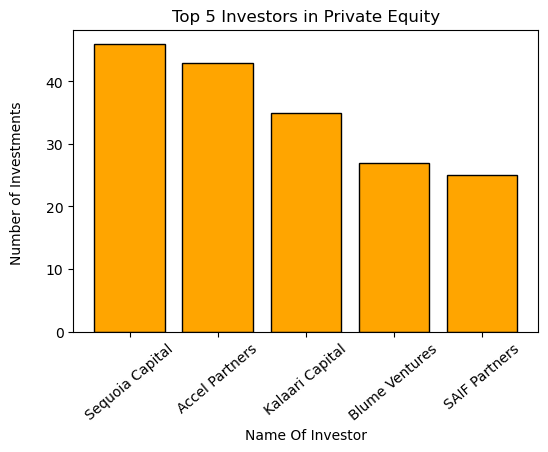

In [17]:
csvDataFrame=pd.read_csv("C:\\Users\\welcome\\Downloads\\startup_funding.csv")
df=csvDataFrame.copy()

StartupNames=df.StartupName
InvestmentType=df.InvestmentType
InvestorsName=df.InvestorsName

# Creating New DataFrame
newDataFrame=pd.DataFrame(zip(InvestmentType,InvestorsName,StartupNames),columns=["Type","InvestorsName","StartupName"])
newDataFrame.dropna(inplace=True)

#getting names of Startup including wrong ones
Startuparr=newDataFrame.StartupName.unique()

# Cleaning the Data of StartupNames
olaIncrtArr=[]
PaytmincrtArr=[]
oyoIncrtArr=[]
flipkartIncrtArr=[]
for i in Startuparr:
    if "Ola" in i.capitalize():
        olaIncrtArr.append(i)
    if "Paytm" in i.capitalize():
        PaytmincrtArr.append(i)
    if "Oyo" in i.capitalize():
        oyoIncrtArr.append(i)
    if "Flipkart" in i.capitalize():
        flipkartIncrtArr.append(i)

oyoIncrtArr.pop(3) # removing OyoFit it is Different Company
newDataFrame.StartupName[(newDataFrame.StartupName).isin(olaIncrtArr)]="Ola"
newDataFrame.StartupName[(newDataFrame.StartupName).isin(PaytmincrtArr)]="Paytm"
newDataFrame.StartupName[(newDataFrame.StartupName).isin(oyoIncrtArr)]="Oyo"
newDataFrame.StartupName[(newDataFrame.StartupName).isin(flipkartIncrtArr)]="Flipkart"


newDataFrame.Type[newDataFrame.Type == "PrivateEquity"] = "Private Equity"
newDataFrame.Type[newDataFrame.Type == "SeedFunding"] = "Seed Funding"
newDataFrame.Type[newDataFrame.Type == "Crowd funding"] = "Crowd Funding"

# DataFrame with Type only Seed Funding and Crowd Funding
newDataFrame=newDataFrame[(newDataFrame.Type == "Private Equity")]
investorName=newDataFrame.InvestorsName

tobeRemoved=[] # list of Unwanted Investors Name 
for investor in investorName:
    if "undisclosed" in str(investor) or "Undisclosed" in str(investor):
        tobeRemoved.append(investor)

# Removing Rows with investors as Undisclosed
newDataFrame.drop(newDataFrame[(newDataFrame.InvestorsName).isin(tobeRemoved)].index,inplace=True)

investorDict={}

for sName,iName in zip(newDataFrame.StartupName,newDataFrame.InvestorsName):
    nameArr=str(iName).split(",")
    for n in nameArr:
        if n != "":
            name=n.strip()
            if investorDict.get(name) is None:
                investorDict[name] = set()
                investorDict[name].add(name)
            else:
                investorDict[n.strip()].add(sName)

# Sorting Dictionary Items according to number of companies in which they are Invested
topInvestor=sorted(investorDict.keys(),key=lambda x:len(investorDict[x]),reverse=True)                
top5Investor=topInvestor[:5] # picking Top 5 Investors


nDiffType=[]
nameInvestor=[]
for name in top5Investor:
    nameInvestor.append(name)
    nDiffType.append(len(investorDict[name]))
    print(name,int(len(investorDict[name])))

plt.figure(dpi=100)
plt.title("Top 5 Investors in Private Equity")
plt.bar(nameInvestor,nDiffType,color="Orange",edgecolor="Black")
plt.xlabel("Name Of Investor")
plt.ylabel("Number of Investments \n")
plt.xticks(rotation=40)
plt.show()